Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [455]:
import pandas as pd
import numpy as np

Read files

In [456]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57605,ZWE,Africa,Zimbabwe,2020-12-28,13148.0,71.0,103.714,354.0,5.0,4.571,884.617,4.777,6.978,23.818,0.336,0.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.0,209742.0,14.112,0.064,1378.0,0.093,0.075,13.3,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57606,ZWE,Africa,Zimbabwe,2020-12-29,13325.0,177.0,111.571,359.0,5.0,4.714,896.526,11.909,7.507,24.154,0.336,0.317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2373.0,212115.0,14.271,0.160,1513.0,0.102,0.074,13.6,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57607,ZWE,Africa,Zimbabwe,2020-12-30,13625.0,300.0,138.429,360.0,1.0,4.286,916.710,20.184,9.314,24.221,0.067,0.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2462.0,214577.0,14.437,0.166,1651.0,0.111,0.084,11.9,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57608,ZWE,Africa,Zimbabwe,2020-12-31,13867.0,242.0,154.429,363.0,3.0,3.429,932.993,16.282,10.390,24.423,0.202,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [457]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57610 entries, 0 to 57609
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57280 non-null  object 
 1   continent                           56934 non-null  object 
 2   location                            57610 non-null  object 
 3   date                                57610 non-null  object 
 4   total_cases                         57053 non-null  float64
 5   new_cases                           57047 non-null  float64
 6   new_cases_smoothed                  56091 non-null  float64
 7   total_deaths                        48772 non-null  float64
 8   new_deaths                          48771 non-null  float64
 9   new_deaths_smoothed                 56091 non-null  float64
 10  total_cases_per_million             56723 non-null  float64
 11  new_cases_per_million               56717

Convert date to number

In [458]:
import datetime 

date = train.date

train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['date_num'] = train['date'].dt.strftime('%d%m%Y')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57605,ZWE,Africa,Zimbabwe,2020-12-28,13148.0,71.0,103.714,354.0,5.0,4.571,884.617,4.777,6.978,23.818,0.336,0.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.0,209742.0,14.112,0.064,1378.0,0.093,0.075,13.3,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,28122020
57606,ZWE,Africa,Zimbabwe,2020-12-29,13325.0,177.0,111.571,359.0,5.0,4.714,896.526,11.909,7.507,24.154,0.336,0.317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2373.0,212115.0,14.271,0.160,1513.0,0.102,0.074,13.6,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,29122020
57607,ZWE,Africa,Zimbabwe,2020-12-30,13625.0,300.0,138.429,360.0,1.0,4.286,916.710,20.184,9.314,24.221,0.067,0.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2462.0,214577.0,14.437,0.166,1651.0,0.111,0.084,11.9,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,30122020
57608,ZWE,Africa,Zimbabwe,2020-12-31,13867.0,242.0,154.429,363.0,3.0,3.429,932.993,16.282,10.390,24.423,0.202,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,31122020


Country

In [459]:
country = train['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Ko

In [460]:
print(len(list_country))

192


Get latest date

In [461]:
from datetime import date 
from datetime import timedelta

In [462]:
today = date.today() 
print("Today is: ", today) 

Today is:  2021-01-02


In [463]:
yesterday = today - timedelta(days = 1) 
print("Yesterday was: ", yesterday)

Yesterday was:  2021-01-01


In [464]:
last_date = train.date.max()
last_date

Timestamp('2021-01-01 00:00:00')

In [465]:
print(type(last_date))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [466]:
yesterday = pd.Timestamp(yesterday)

In [467]:
print(type(yesterday))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [468]:
if last_date == yesterday: 
    last_date = yesterday
elif last_date > yesterday: 
    last_date = yesterday 
else: 
    last_date = last_date
last_date


Timestamp('2021-01-01 00:00:00')

In [469]:
last_date = train[train.date == last_date]
last_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
312,AFG,Asia,Afghanistan,2021-01-01,51526.0,0.0,102.286,2191.0,0.0,7.429,1323.612,0.000,2.628,56.283,0.000,0.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,01012021
611,ALB,Europe,Albania,2021-01-01,58316.0,0.0,419.429,1181.0,0.0,6.714,20264.091,0.000,145.746,410.383,0.000,2.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,01012021
923,DZA,Africa,Algeria,2021-01-01,99897.0,287.0,350.857,2762.0,6.0,6.571,2278.099,6.545,8.001,62.986,0.137,0.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,01012021
1229,AND,Europe,Andorra,2021-01-01,8117.0,68.0,51.571,84.0,0.0,0.143,105054.035,880.088,667.462,1087.168,0.000,1.849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,01012021
1517,AGO,Africa,Angola,2021-01-01,17568.0,15.0,67.000,405.0,0.0,1.286,534.530,0.456,2.039,12.323,0.000,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,01012021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56418,VNM,Asia,Vietnam,2021-01-01,1474.0,9.0,5.000,35.0,0.0,0.000,15.143,0.092,0.051,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,01012021
56764,OWID_WRL,NaN,World,2021-01-01,83963772.0,539326.0,587457.000,1827540.0,9424.0,10987.429,10771.769,69.190,75.365,234.456,1.209,1.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9896753.0,0.13,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,01012021
57031,YEM,Asia,Yemen,2021-01-01,2101.0,2.0,1.286,610.0,0.0,0.571,70.442,0.067,0.043,20.452,0.000,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,01012021
57321,ZMB,Africa,Zambia,2021-01-01,20997.0,272.0,203.714,390.0,2.0,1.286,1142.137,14.796,11.081,21.214,0.109,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,01012021


Graphical representation

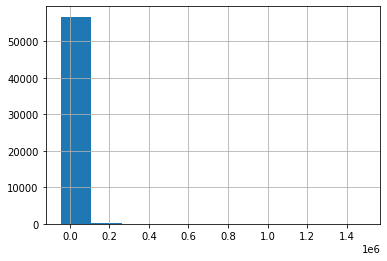

In [470]:
from matplotlib import pyplot as plt

train.new_cases.hist()

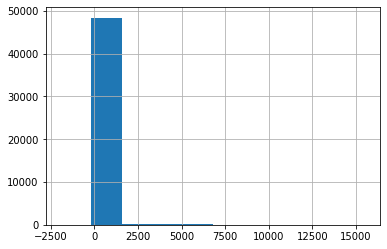

In [471]:
train.new_deaths.hist()

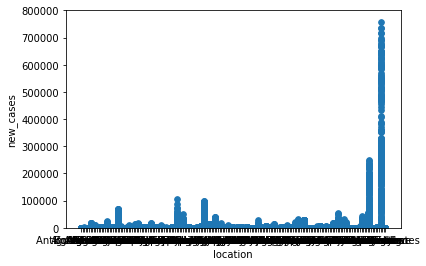

In [472]:
var = 'location'
data = pd.concat([train['new_cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_cases', ylim=(0,800000), s=32);

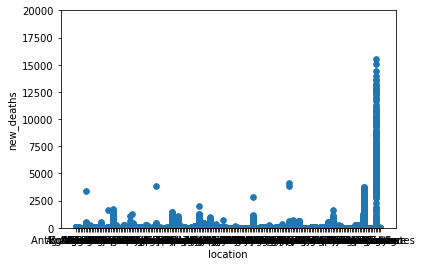

In [473]:
var = 'location'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_deaths', ylim=(0,20000), s=32);

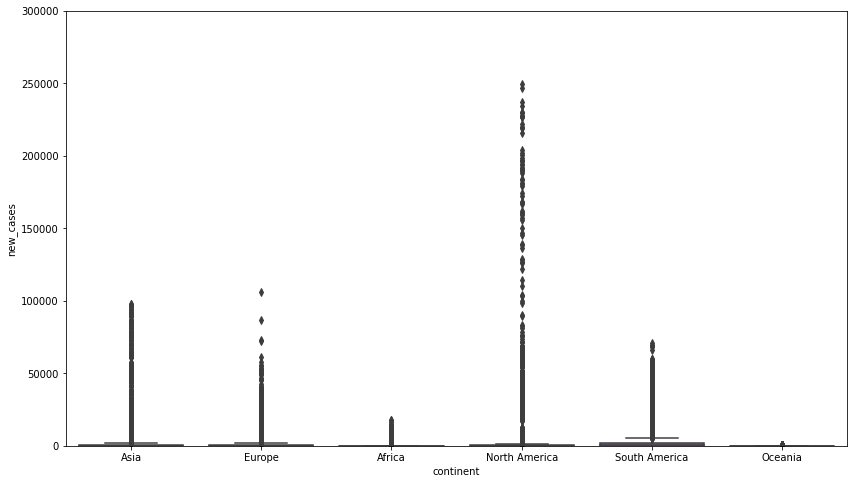

In [474]:
import seaborn as sns

var = 'continent'
data = pd.concat([train['new_cases'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=300000);

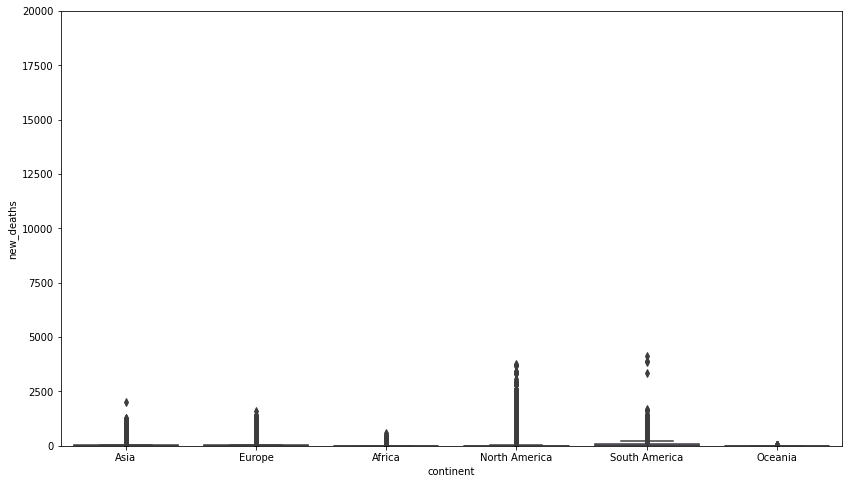

In [475]:
var = 'continent'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

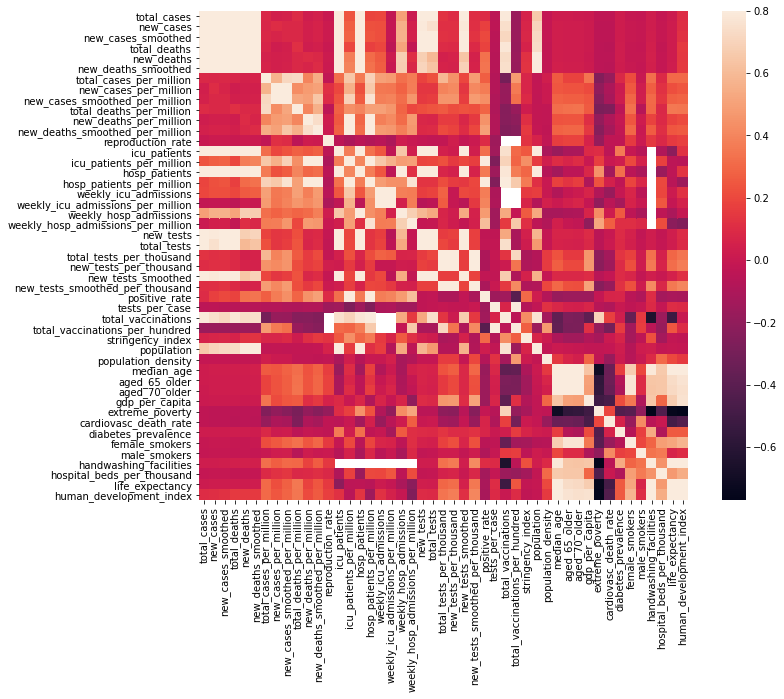

In [476]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

UK

In [477]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
54154,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,31012020
54155,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,01022020
54156,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,02022020
54157,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,03022020
54158,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54486,GBR,Europe,United Kingdom,2020-12-28,2336688.0,41460.0,36715.714,71217.0,357.0,499.857,34420.762,610.730,540.844,1049.067,5.259,7.363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357238.0,51289157.0,755.519,5.262,402747.0,5.933,0.091,11.0,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,28122020
54487,GBR,Europe,United Kingdom,2020-12-29,2389963.0,53275.0,39050.571,71675.0,458.0,466.571,35205.534,784.771,575.237,1055.814,6.747,6.873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344775.0,51635380.0,760.619,5.079,386976.0,5.700,0.101,9.9,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,29122020
54488,GBR,Europe,United Kingdom,2020-12-30,2440202.0,50239.0,40600.857,72657.0,982.0,500.000,35945.583,740.049,598.074,1070.280,14.465,7.365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420492.0,52058247.0,766.848,6.194,374544.0,5.517,0.108,9.2,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,30122020
54489,GBR,Europe,United Kingdom,2020-12-31,2496231.0,56029.0,43012.429,73622.0,965.0,555.714,36770.923,825.339,633.598,1084.495,14.215,8.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,397

Text(0, 0.5, 'uk_new_cases_per_million')

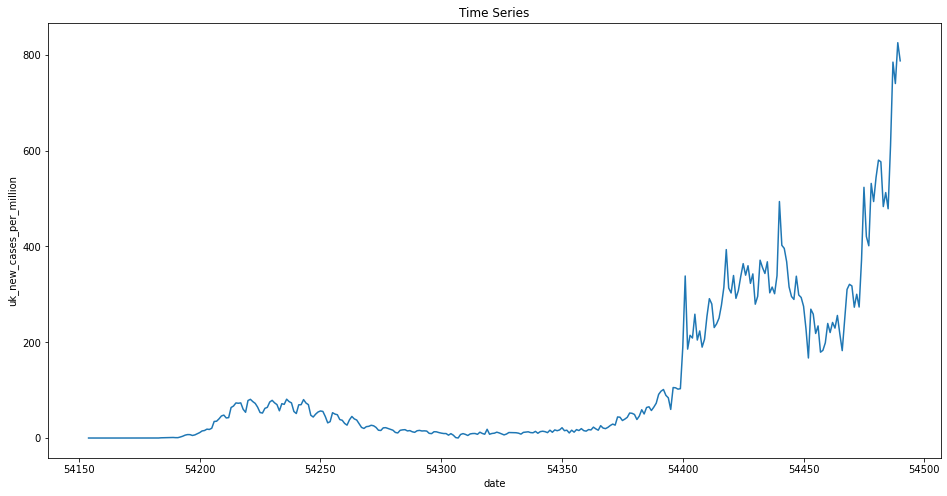

In [478]:
import matplotlib.pyplot as plt

uk_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_cases_per_million")

Text(0, 0.5, 'uk_new_deaths_per_million')

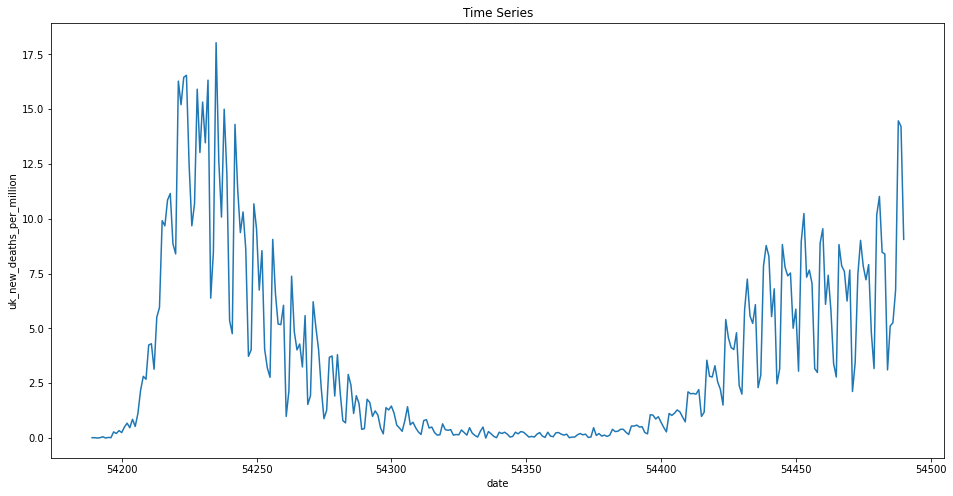

In [479]:
uk_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths_per_million")

US

In [480]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
54491,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,22012020
54492,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,23012020
54493,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,24012020
54494,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,25012020
54495,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54832,USA,North America,United States,2020-12-28,19309281.0,166678.0,180604.714,334836.0,1718.0,2210.286,58335.730,503.555,545.629,1011.581,5.190,6.678,NaN,22592.0,68.253,121235.0,366.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2127143.0,0.64,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,28122020
54833,USA,North America,United States,2020-12-29,19511426.0,202145.0,181666.857,338568.0,3732.0,2257.571,58946.435,610.705,548.838,1022.856,11.275,6.820,NaN,22843.0,69.012,124693.0,376.713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,29122020
54834,USA,North America,United States,2020-12-30,19740772.0,229346.0,182041.143,342318.0,3750.0,2313.429,59639.318,692.883,549.969,1034.185,11.329,6.989,NaN,23069.0,69.694,125220.0,378.305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2794588.0,0.84,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,30122020
54835,USA,North America,United States,2020-12-31,19968087.0,227315.0,186106.286,345737.0,3419.0,2387.714,60326.064,686.747,562.250,1044.514,10.329,7.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.4

Text(0, 0.5, 'us_new_cases_per_million')

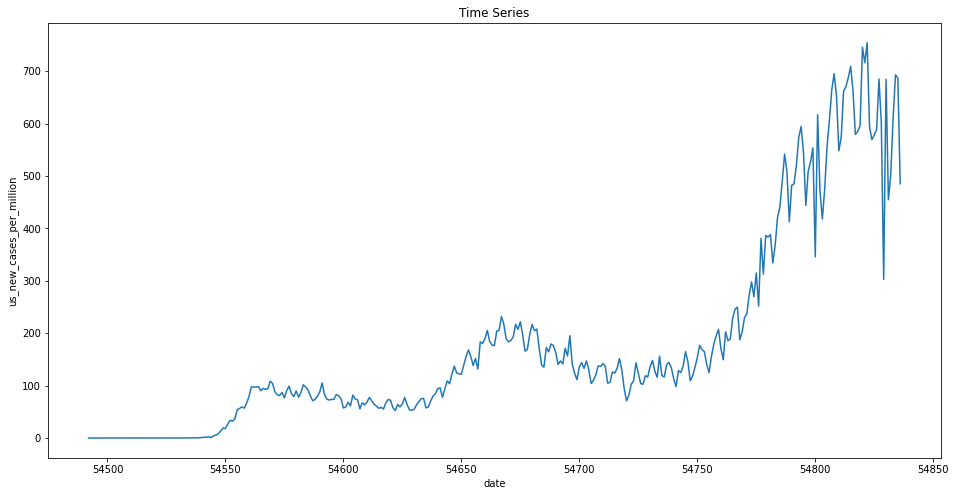

In [481]:
us_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases_per_million")

Text(0, 0.5, 'us_new_deaths_per_million')

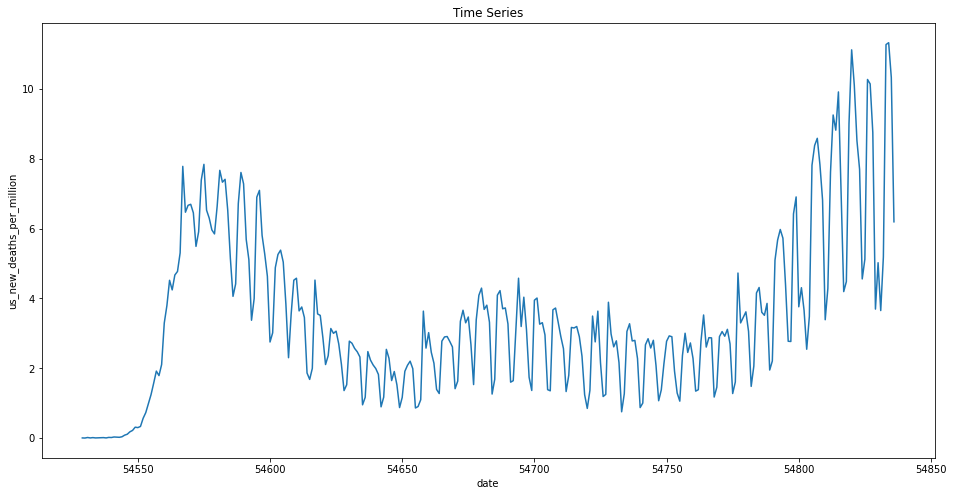

In [482]:
us_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

China

In [483]:
country = "China"

include_c = train[train['location'].values == country]
exclude_c = train[train['location'].values != country]
c_cov19 = include_c
c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
10670,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,22012020
10671,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,23012020
10672,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,0.639,0.192,NaN,0.018,0.006,NaN,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,24012020
10673,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,0.977,0.338,NaN,0.029,0.011,NaN,3.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,25012020
10674,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,1.442,0.465,NaN,0.039,0.010,NaN,3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,CHN,Asia,China,2020-12-28,95720.0,88.0,81.429,4775.0,4.0,1.429,66.503,0.061,0.057,3.318,0.003,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,28122020
11012,CHN,Asia,China,2020-12-29,95797.0,77.0,81.286,4777.0,2.0,1.571,66.557,0.053,0.056,3.319,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,29122020
11013,CHN,Asia,China,2020-12-30,95876.0,79.0,82.571,4781.0,4.0,2.000,66.612,0.055,0.057,3.322,0.003,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,30122020
11014,CHN,Asia,China,2020-12-31,95963.0,87.0,82.857,4782.0,1.0,1.857,66.672,0.060,0.058,3.322,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500000.0,0.31,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,31122020


Text(0, 0.5, 'china_new_cases_per_million')

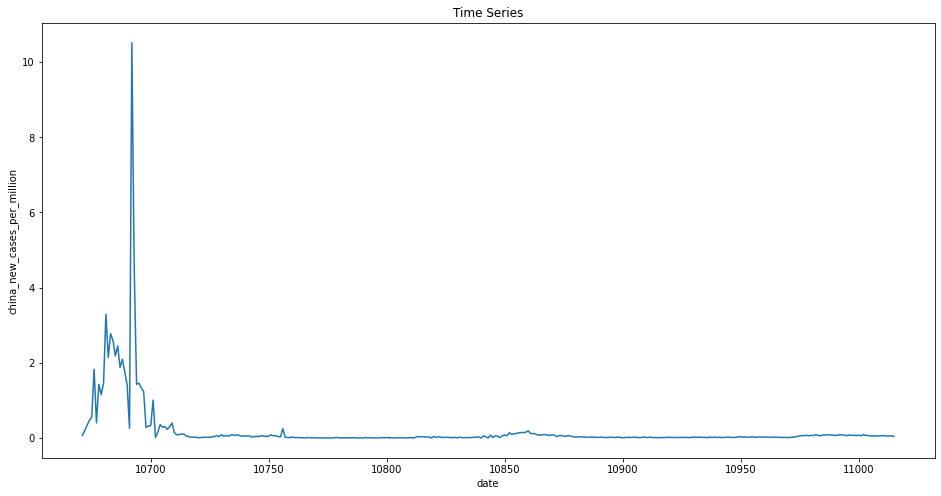

In [484]:
c_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_cases_per_million")

Text(0, 0.5, 'china_new_deaths_per_million')

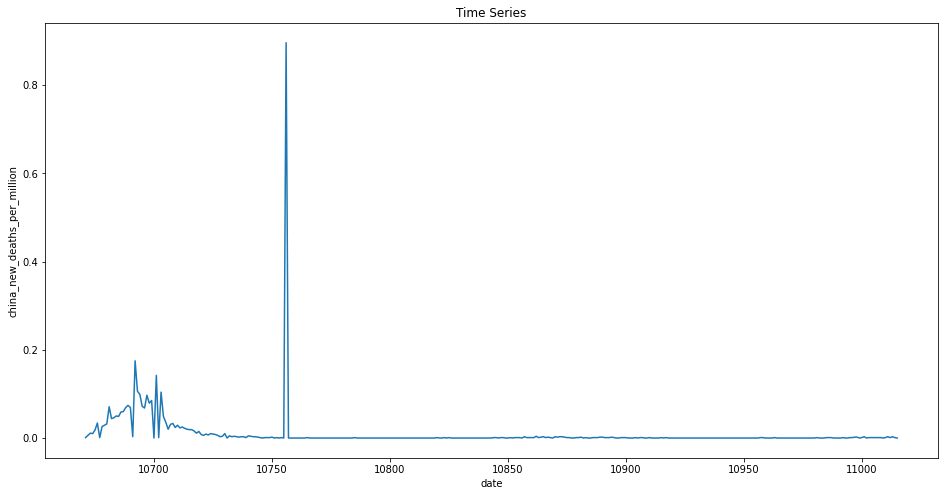

In [485]:
c_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("china_new_deaths_per_million")

Taiwan

In [486]:
country = "Taiwan"

include_t = train[train['location'].values == country]
exclude_t = train[train['location'].values != country]
t_cov19 = include_t
t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
50483,TWN,Asia,Taiwan,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,16012020
50484,TWN,Asia,Taiwan,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,17012020
50485,TWN,Asia,Taiwan,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,18012020
50486,TWN,Asia,Taiwan,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,8.33,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,19012020
50487,TWN,Asia,Taiwan,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,13.89,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,20012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50830,TWN,Asia,Taiwan,2020-12-28,793.0,8.0,3.857,7.0,0.0,0.0,33.296,0.336,0.162,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1017.0,125008.0,5.249,0.043,667.0,0.028,0.006,172.9,people tested,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,28122020
50831,TWN,Asia,Taiwan,2020-12-29,795.0,2.0,3.571,7.0,0.0,0.0,33.380,0.084,0.150,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812.0,125820.0,5.283,0.034,669.0,0.028,0.005,187.3,people tested,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,29122020
50832,TWN,Asia,Taiwan,2020-12-30,797.0,2.0,3.000,7.0,0.0,0.0,33.464,0.084,0.126,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,674.0,126494.0,5.311,0.028,670.0,0.028,0.004,223.3,people tested,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,30122020
50833,TWN,Asia,Taiwan,2020-12-31,799.0,2.0,3.286,7.0,0.0,0.0,33.548,0.084,0.138,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0,127000.0,5.332,0.021,638.0,0.027,0.005,194.2,people tested,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,31122020


Text(0, 0.5, 'taiwan_new_cases_per_million')

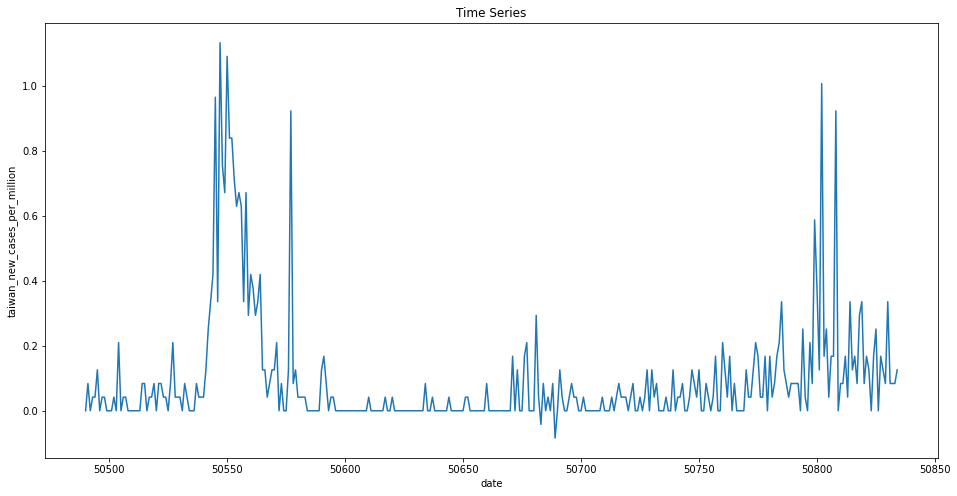

In [487]:
t_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_cases_per_million")

Text(0, 0.5, 'taiwan_new_deaths_per_million')

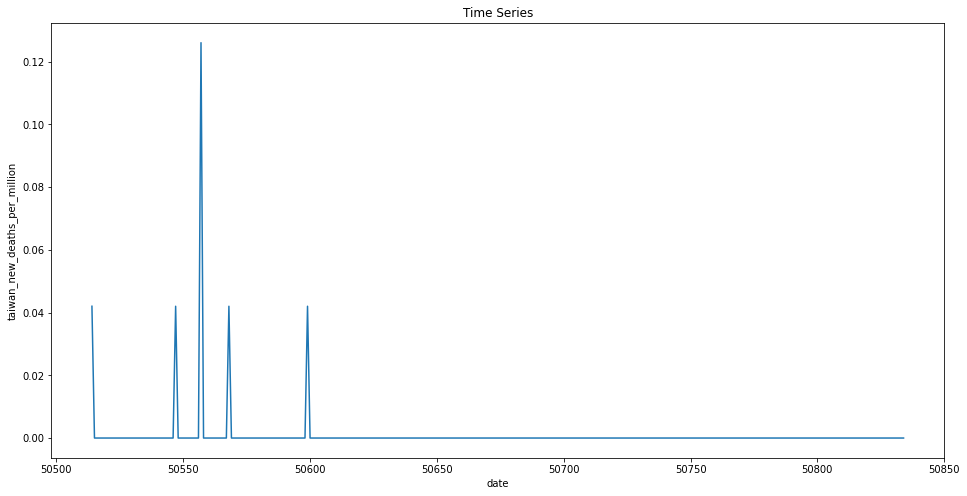

In [488]:
t_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("taiwan_new_deaths_per_million")

South Africa

In [489]:
country = "South Africa"

include_sa = train[train['location'].values == country]
exclude_sa = train[train['location'].values != country]
sa_cov19 = include_sa
sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
47302,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,07022020
47303,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,08022020
47304,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,09022020
47305,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,10022020
47306,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,11022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47627,ZAF,Africa,South Africa,2020-12-28,1011871.0,7458.0,11594.286,27071.0,336.0,309.143,17061.092,125.749,195.491,456.442,5.665,5.212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23707.0,6469025.0,109.074,0.400,41763.0,0.704,0.278,3.6,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,28122020
47628,ZAF,Africa,South Africa,2020-12-29,1021451.0,9580.0,11605.571,27568.0,497.0,331.714,17222.619,161.528,195.681,464.822,8.380,5.593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31457.0,6500482.0,109.604,0.530,40679.0,0.686,0.285,3.5,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,29122020
47629,ZAF,Africa,South Africa,2020-12-30,1039161.0,17710.0,12129.000,28033.0,465.0,339.429,17521.227,298.607,204.506,472.663,7.840,5.723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53279.0,6553761.0,110.503,0.898,40569.0,0.684,0.299,3.3,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,30122020
47630,ZAF,Africa,South Africa,2020-12-31,1057161.0,18000.0,12656.857,28469.0,436.0,355.143,17824.723,303.497,213.406,480.014,7.351,5.988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55447.0,6609208.0,111.437,0.935,40489.0,0.683,0.313,3.2,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5

Text(0, 0.5, 'sa_new_cases_per_million')

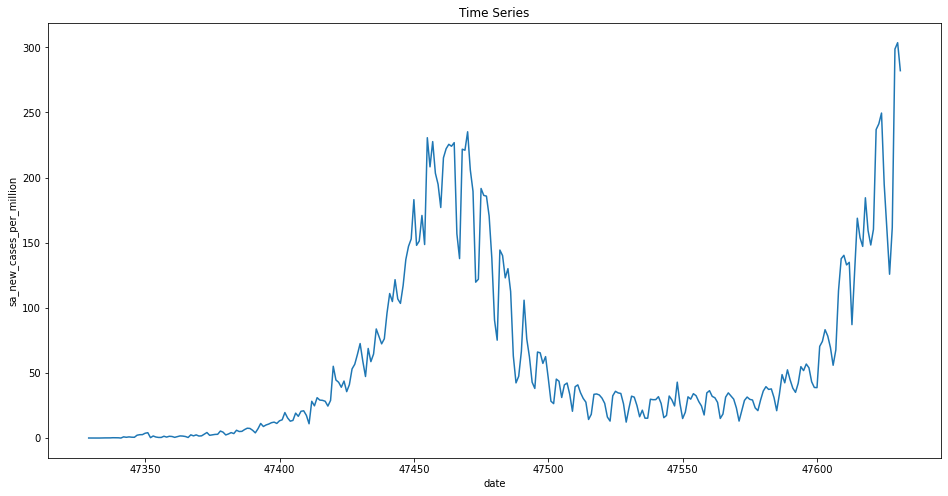

In [490]:
sa_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_cases_per_million")

Text(0, 0.5, 'sa_new_deaths_per_million')

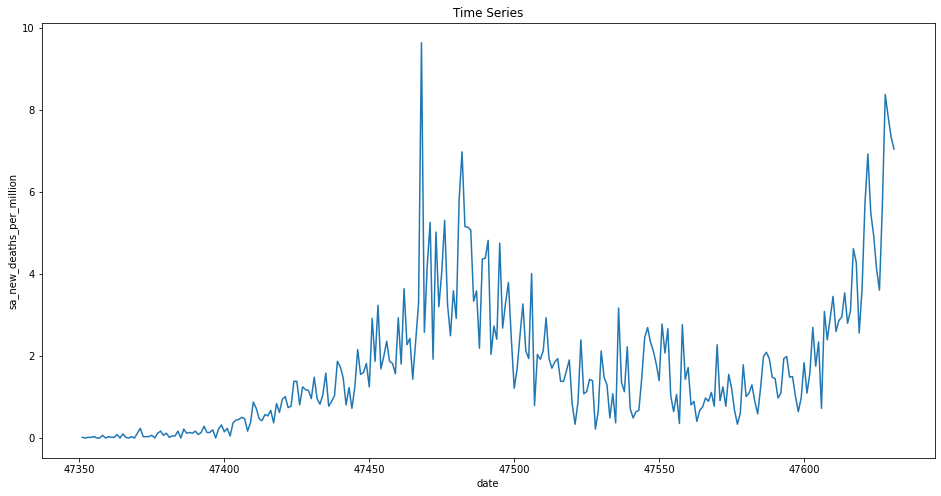

In [491]:
sa_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sa_new_deaths_per_million")

Nigeria

In [492]:
country = "Nigeria"

include_n = train[train['location'].values == country]
exclude_n = train[train['location'].values != country]
n_cov19 = include_n
n_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
37730,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,28022020
37731,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,29022020
37732,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,01032020
37733,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,02032020
37734,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38034,NGA,Africa,Nigeria,2020-12-28,84811.0,397.0,860.143,1264.0,10.0,5.286,411.425,1.926,4.173,6.132,0.049,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,932327.0,4.523,NaN,5534.0,0.027,0.155,6.4,samples tested,NaN,NaN,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,28122020
38035,NGA,Africa,Nigeria,2020-12-29,85560.0,749.0,824.429,1267.0,3.0,5.143,415.059,3.633,3.999,6.146,0.015,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5385.0,937712.0,4.549,0.026,4845.0,0.024,0.170,5.9,samples tested,NaN,NaN,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,29122020
38036,NGA,Africa,Nigeria,2020-12-30,86576.0,1016.0,807.714,1278.0,11.0,6.000,419.987,4.929,3.918,6.200,0.053,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890.0,938602.0,4.553,0.004,4378.0,0.021,0.184,5.4,samples tested,NaN,NaN,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,30122020
38037,NGA,Africa,Nigeria,2020-12-31,87607.0,1031.0,806.286,1289.0,11.0,6.714,424.989,5.001,3.911,6.253,0.053,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9446.0,948048.0,4.599,0.046,5133.0,0.025,0.157,6.4,samples tested,NaN,NaN,NaN,206139587.0,209.588,18.1,2.751,1.447,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532,31122020


Text(0, 0.5, 'n_new_cases_per_million')

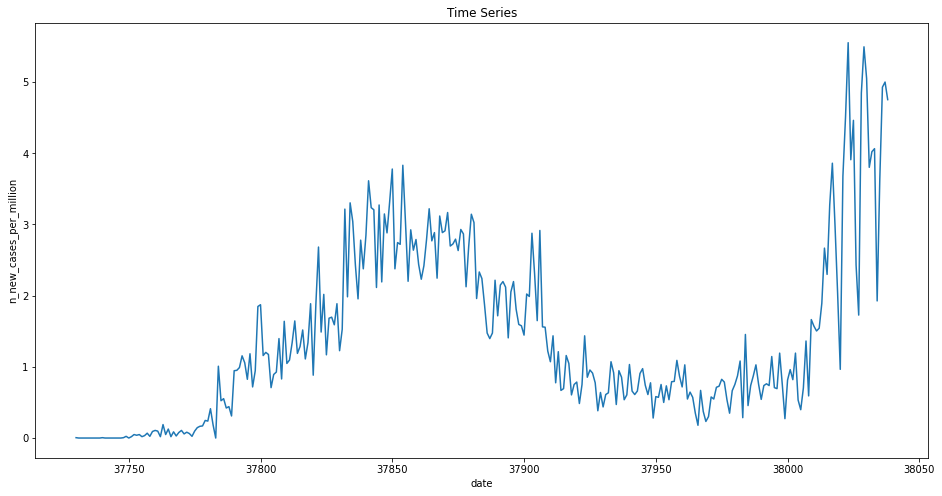

In [493]:
n_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_cases_per_million")

Text(0, 0.5, 'n_new_deaths_per_million')

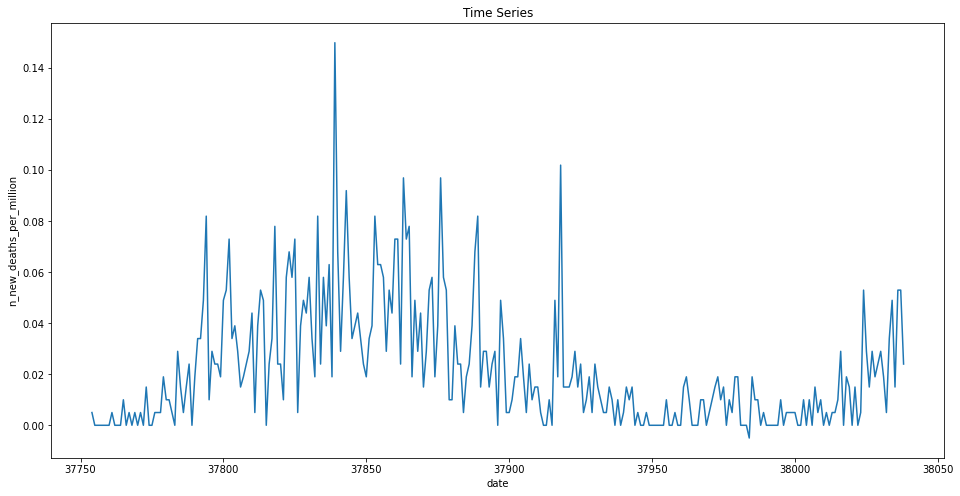

In [494]:
n_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("n_new_deaths_per_million")

Sweden

In [495]:
country = "Sweden"

include_s = train[train['location'].values == country]
exclude_s = train[train['location'].values != country]
s_cov19 = include_s
s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
49517,SWE,Europe,Sweden,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,0.099,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,01022020
49518,SWE,Europe,Sweden,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,02022020
49519,SWE,Europe,Sweden,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,03022020
49520,SWE,Europe,Sweden,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,04022020
49521,SWE,Europe,Sweden,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,0.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,05022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49848,SWE,Europe,Sweden,2020-12-28,396048.0,0.0,4132.571,8279.0,0.0,40.857,39215.508,0.000,409.195,819.762,0.000,4.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,28122020
49849,SWE,Europe,Sweden,2020-12-29,428533.0,32485.0,5584.857,8484.0,205.0,45.286,42432.077,3216.569,552.996,840.061,20.298,4.484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,29122020
49850,SWE,Europe,Sweden,2020-12-30,437379.0,8846.0,5904.429,8727.0,243.0,64.000,43307.982,875.905,584.639,864.122,24.061,6.337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,30122020
49851,SWE,Europe,Sweden,2020-12-31,437379.0,0.0,5904.429,8727.0,0.0,64.000,43307.982,0.000,584.639,864.122,0.000,6.337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,31122020


Text(0, 0.5, 'sweden_new_cases_per_million')

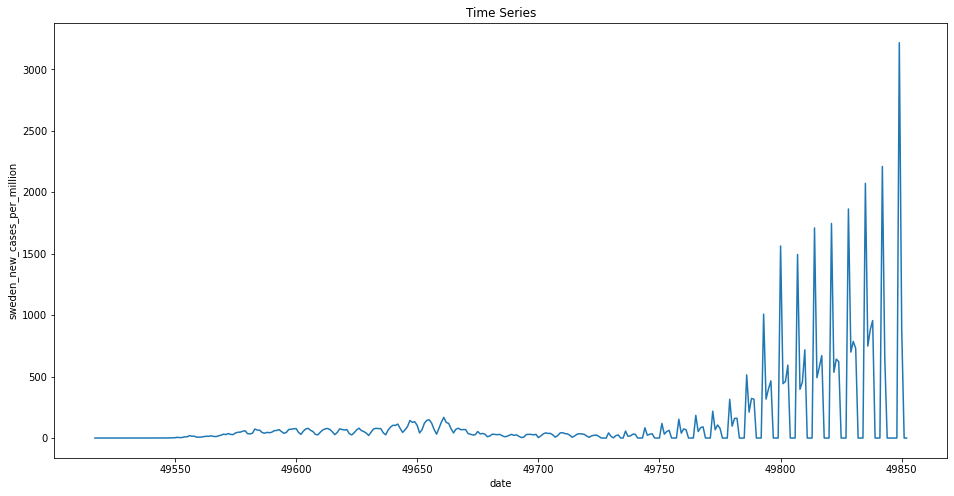

In [496]:
s_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_cases_per_million")

Text(0, 0.5, 'sweden_new_deaths_per_million')

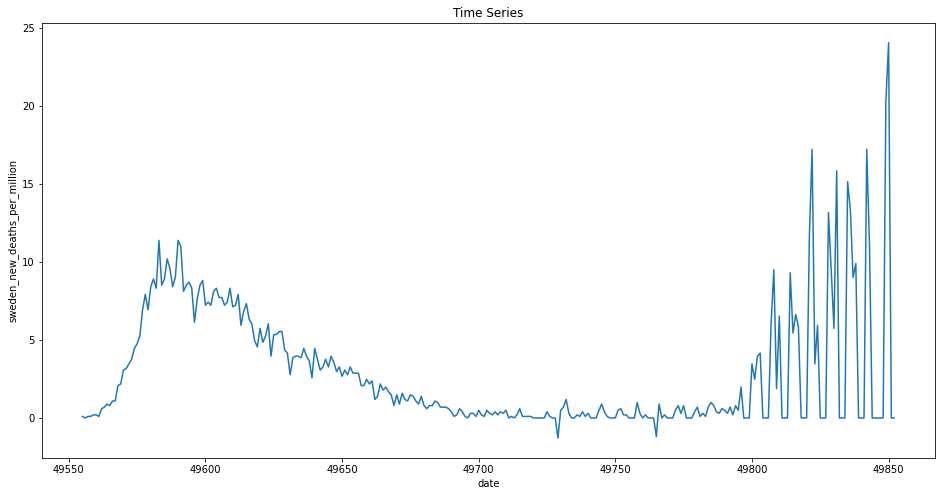

In [497]:
s_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("sweden_new_deaths_per_million")

Denmark

In [498]:
country = "Denmark"

include_d = train[train['location'].values == country]
exclude_d = train[train['location'].values != country]
d_cov19 = include_d
d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
14002,DNK,Europe,Denmark,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.000,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,27012020
14003,DNK,Europe,Denmark,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,28012020
14004,DNK,Europe,Denmark,2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.000,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,29012020
14005,DNK,Europe,Denmark,2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,30012020
14006,DNK,Europe,Denmark,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,0.0,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,31012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14338,DNK,Europe,Denmark,2020-12-28,156434.0,2482.0,2604.286,1204.0,30.0,21.571,27007.686,428.507,449.619,207.866,5.179,3.724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111337.0,10241709.0,1768.189,19.222,85601.0,14.779,0.030,32.9,tests performed,7988.0,0.14,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,28122020
14339,DNK,Europe,Denmark,2020-12-29,159074.0,2640.0,2617.714,1226.0,22.0,22.286,27463.471,455.785,451.938,211.664,3.798,3.848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114373.0,10356082.0,1787.935,19.746,78845.0,13.612,0.033,30.1,tests performed,15324.0,0.26,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,29122020
14340,DNK,Europe,Denmark,2020-12-30,161862.0,2788.0,2544.143,1256.0,30.0,22.857,27944.808,481.337,439.236,216.843,5.179,3.946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24563.0,0.42,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,30122020
14341,DNK,Europe,Denmark,2020-12-31,164116.0,2254.0,2455.571,1298.0,42.0,26.286,28333.952,389.144,423.944,224.094,7.251,4.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29483.0,0.51,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,31122020


Text(0, 0.5, 'denmark_new_cases_per_million')

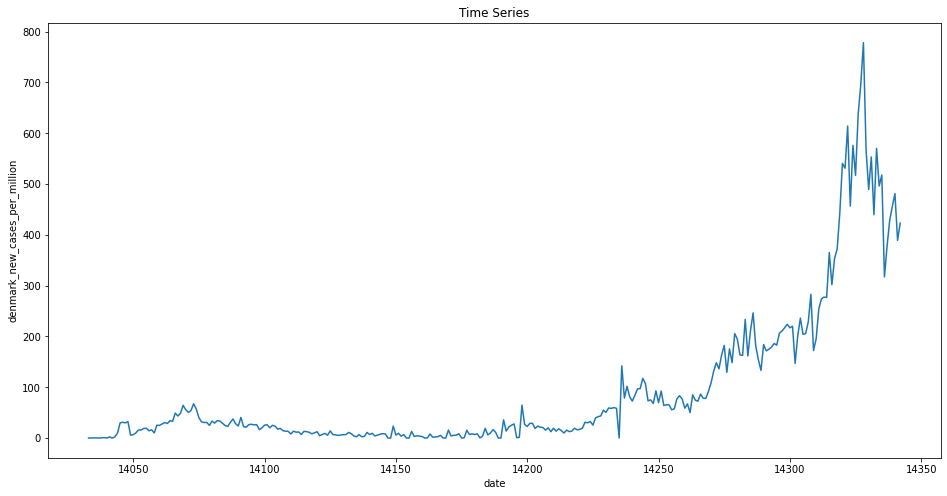

In [499]:
d_cov19['new_cases_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_cases_per_million")

Text(0, 0.5, 'denmark_new_deaths_per_million')

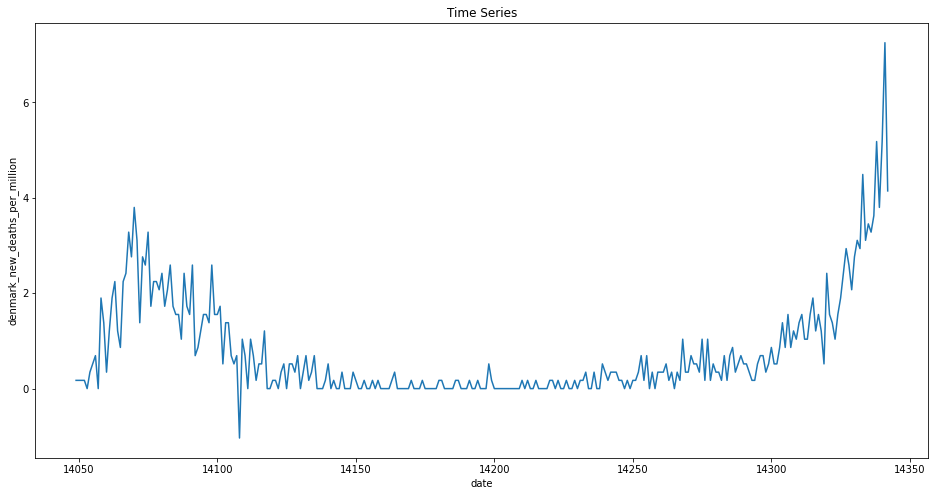

In [500]:
d_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("denmark_new_deaths_per_million")

Compare new cases per million to new deaths per million

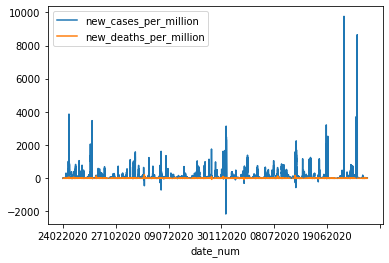

In [501]:
train.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

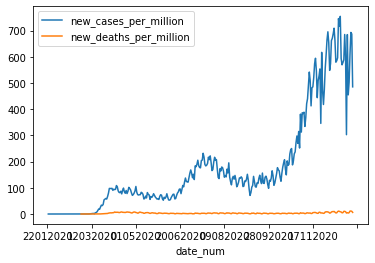

In [502]:
us_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

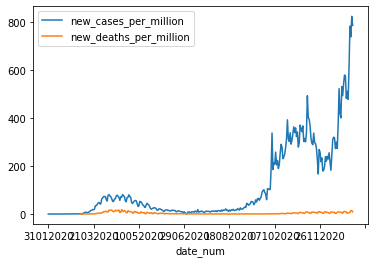

In [503]:
uk_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

Compare Countries

In [504]:
revised_uk_cov19 = uk_cov19[28:]
revised_uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
54182,GBR,Europe,United Kingdom,2020-02-28,56.0,12.0,4.714,NaN,NaN,0.000,0.825,0.177,0.069,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,28022020
54183,GBR,Europe,United Kingdom,2020-02-29,61.0,5.0,5.429,NaN,NaN,0.000,0.899,0.074,0.080,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,29022020
54184,GBR,Europe,United Kingdom,2020-03-01,94.0,33.0,9.429,NaN,NaN,0.000,1.385,0.486,0.139,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.093,0.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,01032020
54185,GBR,Europe,United Kingdom,2020-03-02,134.0,40.0,14.857,NaN,NaN,0.000,1.974,0.589,0.219,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,02032020
54186,GBR,Europe,United Kingdom,2020-03-03,189.0,55.0,22.143,NaN,NaN,0.000,2.784,0.810,0.326,NaN,NaN,0.000,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54486,GBR,Europe,United Kingdom,2020-12-28,2336688.0,41460.0,36715.714,71217.0,357.0,499.857,34420.762,610.730,540.844,1049.067,5.259,7.363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357238.0,51289157.0,755.519,5.262,402747.0,5.933,0.091,11.0,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,28122020
54487,GBR,Europe,United Kingdom,2020-12-29,2389963.0,53275.0,39050.571,71675.0,458.0,466.571,35205.534,784.771,575.237,1055.814,6.747,6.873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344775.0,51635380.0,760.619,5.079,386976.0,5.700,0.101,9.9,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,29122020
54488,GBR,Europe,United Kingdom,2020-12-30,2440202.0,50239.0,40600.857,72657.0,982.0,500.000,35945.583,740.049,598.074,1070.280,14.465,7.365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420492.0,52058247.0,766.848,6.194,374544.0,5.517,0.108,9.2,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,30122020
54489,GBR,Europe,United Kingdom,2020-12-31,2496231.0,56029.0,43012.429,73622.0,965.0,555.714,36770.923,825.339,633.598,1084.495,14.215,8.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [505]:
revised_us_cov19 = us_cov19[37:]
revised_us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
54528,USA,North America,United States,2020-02-28,17.0,0.0,0.143,NaN,NaN,0.000,0.051,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,28022020
54529,USA,North America,United States,2020-02-29,25.0,8.0,1.286,1.0,1.0,0.143,0.076,0.024,0.004,0.003,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,29022020
54530,USA,North America,United States,2020-03-01,32.0,7.0,2.286,1.0,0.0,0.143,0.097,0.021,0.007,0.003,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0,183.0,0.001,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,8.33,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,01032020
54531,USA,North America,United States,2020-03-02,55.0,23.0,5.571,6.0,5.0,0.857,0.166,0.069,0.017,0.018,0.015,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.0,638.0,0.002,0.001,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,02032020
54532,USA,North America,United States,2020-03-03,74.0,19.0,8.286,7.0,1.0,1.000,0.224,0.057,0.025,0.021,0.003,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.0,1442.0,0.004,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,11.11,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54832,USA,North America,United States,2020-12-28,19309281.0,166678.0,180604.714,334836.0,1718.0,2210.286,58335.730,503.555,545.629,1011.581,5.190,6.678,NaN,22592.0,68.253,121235.0,366.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2127143.0,0.64,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,28122020
54833,USA,North America,United States,2020-12-29,19511426.0,202145.0,181666.857,338568.0,3732.0,2257.571,58946.435,610.705,548.838,1022.856,11.275,6.820,NaN,22843.0,69.012,124693.0,376.713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,29122020
54834,USA,North America,United States,2020-12-30,19740772.0,229346.0,182041.143,342318.0,3750.0,2313.429,59639.318,692.883,549.969,1034.185,11.329,6.989,NaN,23069.0,69.694,125220.0,378.305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2794588.0,0.84,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,30122020
54835,USA,North America,United States,2020-12-31,19968087.0,227315.0,186106.286,345737.0,3419.0,2387.714,60326.064,686.747,562.250,1

In [506]:
revised_c_cov19 = c_cov19[37:]
revised_c_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
10707,CHN,Asia,China,2020-02-28,78928.0,328.0,482.571,2790.0,44.0,78.857,54.837,0.228,0.335,1.938,0.031,0.055,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,28022020
10708,CHN,Asia,China,2020-02-29,79356.0,428.0,336.429,2837.0,47.0,56.286,55.134,0.297,0.234,1.971,0.033,0.039,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,29022020
10709,CHN,Asia,China,2020-03-01,79932.0,576.0,415.714,2872.0,35.0,61.000,55.534,0.400,0.289,1.995,0.024,0.042,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,01032020
10710,CHN,Asia,China,2020-03-02,80136.0,204.0,413.571,2914.0,42.0,45.571,55.676,0.142,0.287,2.025,0.029,0.032,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,02032020
10711,CHN,Asia,China,2020-03-03,80261.0,125.0,358.143,2947.0,33.0,40.286,55.763,0.087,0.249,2.047,0.023,0.028,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.02,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,CHN,Asia,China,2020-12-28,95720.0,88.0,81.429,4775.0,4.0,1.429,66.503,0.061,0.057,3.318,0.003,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,28122020
11012,CHN,Asia,China,2020-12-29,95797.0,77.0,81.286,4777.0,2.0,1.571,66.557,0.053,0.056,3.319,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,29122020
11013,CHN,Asia,China,2020-12-30,95876.0,79.0,82.571,4781.0,4.0,2.000,66.612,0.055,0.057,3.322,0.003,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,30122020
11014,CHN,Asia,China,2020-12-31,95963.0,87.0,82.857,4782.0,1.0,1.857,66.672,0.060,0.058,3.322,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500000.0,0.31,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752,31122020


In [507]:
revised_t_cov19 = t_cov19[43:]
revised_t_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
50526,TWN,Asia,Taiwan,2020-02-28,34.0,2.0,1.143,1.0,0.0,0.0,1.428,0.084,0.048,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,10318.0,0.433,0.016,499.0,0.021,0.002,436.6,people tested,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,28022020
50527,TWN,Asia,Taiwan,2020-02-29,39.0,5.0,1.857,1.0,0.0,0.0,1.638,0.210,0.078,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511.0,10829.0,0.455,0.021,508.0,0.021,0.004,273.6,people tested,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,29022020
50528,TWN,Asia,Taiwan,2020-03-01,40.0,1.0,1.714,1.0,0.0,0.0,1.679,0.042,0.072,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,11259.0,0.473,0.018,523.0,0.022,0.003,305.1,people tested,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,01032020
50529,TWN,Asia,Taiwan,2020-03-02,41.0,1.0,1.571,1.0,0.0,0.0,1.721,0.042,0.066,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,11859.0,0.498,0.025,509.0,0.021,0.003,324.0,people tested,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,02032020
50530,TWN,Asia,Taiwan,2020-03-03,42.0,1.0,1.571,1.0,0.0,0.0,1.763,0.042,0.066,0.042,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0,12365.0,0.519,0.021,494.0,0.021,0.003,314.4,people tested,NaN,NaN,23.15,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50830,TWN,Asia,Taiwan,2020-12-28,793.0,8.0,3.857,7.0,0.0,0.0,33.296,0.336,0.162,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1017.0,125008.0,5.249,0.043,667.0,0.028,0.006,172.9,people tested,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,28122020
50831,TWN,Asia,Taiwan,2020-12-29,795.0,2.0,3.571,7.0,0.0,0.0,33.380,0.084,0.150,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812.0,125820.0,5.283,0.034,669.0,0.028,0.005,187.3,people tested,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,29122020
50832,TWN,Asia,Taiwan,2020-12-30,797.0,2.0,3.000,7.0,0.0,0.0,33.464,0.084,0.126,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,674.0,126494.0,5.311,0.028,670.0,0.028,0.004,223.3,people tested,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,30122020
50833,TWN,Asia,Taiwan,2020-12-31,799.0,2.0,3.286,7.0,0.0,0.0,33.548,0.084,0.138,0.294,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0,127000.0,5.332,0.021,638.0,0.027,0.005,194.2,people tested,NaN,NaN,NaN,23816775.0,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN,31122020


In [508]:
revised_s_cov19 = s_cov19[27:]
revised_s_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
49544,SWE,Europe,Sweden,2020-02-28,11.0,8.0,1.429,NaN,NaN,0.000,1.089,0.792,0.141,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,28022020
49545,SWE,Europe,Sweden,2020-02-29,14.0,3.0,1.857,NaN,NaN,0.000,1.386,0.297,0.184,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,29022020
49546,SWE,Europe,Sweden,2020-03-01,14.0,0.0,1.857,NaN,NaN,0.000,1.386,0.000,0.184,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,01032020
49547,SWE,Europe,Sweden,2020-03-02,19.0,5.0,2.571,NaN,NaN,0.000,1.881,0.495,0.255,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,02032020
49548,SWE,Europe,Sweden,2020-03-03,32.0,13.0,4.429,NaN,NaN,0.000,3.169,1.287,0.439,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49848,SWE,Europe,Sweden,2020-12-28,396048.0,0.0,4132.571,8279.0,0.0,40.857,39215.508,0.000,409.195,819.762,0.000,4.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,28122020
49849,SWE,Europe,Sweden,2020-12-29,428533.0,32485.0,5584.857,8484.0,205.0,45.286,42432.077,3216.569,552.996,840.061,20.298,4.484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,29122020
49850,SWE,Europe,Sweden,2020-12-30,437379.0,8846.0,5904.429,8727.0,243.0,64.000,43307.982,875.905,584.639,864.122,24.061,6.337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,30122020
49851,SWE,Europe,Sweden,2020-12-31,437379.0,0.0,5904.429,8727.0,0.0,64.000,43307.982,0.000,584.639,864.122,0.000,6.337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10099270.0,24.718,41.0,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,31122020


In [509]:
revised_d_cov19 = d_cov19[32:]
revised_d_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
14034,DNK,Europe,Denmark,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.173,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,234.0,0.040,0.011,31.0,0.005,NaN,NaN,tests performed,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,28022020
14035,DNK,Europe,Denmark,2020-02-29,3.0,2.0,NaN,NaN,NaN,NaN,0.518,0.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,308.0,0.053,0.013,41.0,0.007,NaN,NaN,tests performed,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,29022020
14036,DNK,Europe,Denmark,2020-03-01,4.0,1.0,NaN,NaN,NaN,NaN,0.691,0.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998,0.172,49.0,357.0,0.062,0.008,48.0,0.008,NaN,NaN,tests performed,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,01032020
14037,DNK,Europe,Denmark,2020-03-02,4.0,0.0,NaN,NaN,NaN,NaN,0.691,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,437.0,0.075,0.014,59.0,0.010,NaN,NaN,tests performed,NaN,NaN,11.11,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,02032020
14038,DNK,Europe,Denmark,2020-03-03,6.0,2.0,0.857,NaN,NaN,0.000,1.036,0.345,0.148,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,500.0,0.086,0.011,67.0,0.012,0.013,78.2,tests performed,NaN,NaN,20.37,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14338,DNK,Europe,Denmark,2020-12-28,156434.0,2482.0,2604.286,1204.0,30.0,21.571,27007.686,428.507,449.619,207.866,5.179,3.724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111337.0,10241709.0,1768.189,19.222,85601.0,14.779,0.030,32.9,tests performed,7988.0,0.14,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,28122020
14339,DNK,Europe,Denmark,2020-12-29,159074.0,2640.0,2617.714,1226.0,22.0,22.286,27463.471,455.785,451.938,211.664,3.798,3.848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114373.0,10356082.0,1787.935,19.746,78845.0,13.612,0.033,30.1,tests performed,15324.0,0.26,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,29122020
14340,DNK,Europe,Denmark,2020-12-30,161862.0,2788.0,2544.143,1256.0,30.0,22.857,27944.808,481.337,439.236,216.843,5.179,3.946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24563.0,0.42,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.929,30122020
14341,DNK,Europe,Denmark,2020-12-31,164116.0,2254.0,2455.571,1298.0,42.0,26.286,28333.952,389.144,423.944,224.094,7.251,4.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29483.0,0.51,NaN,5792203.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.

In [510]:
revised_sa_cov19 = sa_cov19[21:]
revised_sa_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
47323,ZAF,Africa,South Africa,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.000,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,28022020
47324,ZAF,Africa,South Africa,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.000,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,29022020
47325,ZAF,Africa,South Africa,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,01032020
47326,ZAF,Africa,South Africa,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,0.003,NaN,6.0,0.000,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,02032020
47327,ZAF,Africa,South Africa,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,164.0,0.003,0.000,6.0,0.000,NaN,NaN,people tested,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,03032020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47627,ZAF,Africa,South Africa,2020-12-28,1011871.0,7458.0,11594.286,27071.0,336.0,309.143,17061.092,125.749,195.491,456.442,5.665,5.212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23707.0,6469025.0,109.074,0.400,41763.0,0.704,0.278,3.6,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,28122020
47628,ZAF,Africa,South Africa,2020-12-29,1021451.0,9580.0,11605.571,27568.0,497.0,331.714,17222.619,161.528,195.681,464.822,8.380,5.593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31457.0,6500482.0,109.604,0.530,40679.0,0.686,0.285,3.5,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,29122020
47629,ZAF,Africa,South Africa,2020-12-30,1039161.0,17710.0,12129.000,28033.0,465.0,339.429,17521.227,298.607,204.506,472.663,7.840,5.723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53279.0,6553761.0,110.503,0.898,40569.0,0.684,0.299,3.3,people tested,NaN,NaN,NaN,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.699,30122020
47630,ZAF,Africa,South Africa,2020-12-31,1057161.0,18000.0,12656.857,28469.0,436.0,355.143,17824.723,303.497,213.406,480.014,7.351,5.988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55447.0,6609208.0,111.437,0.935,40489.0,0.683,0.313,3.2,people tested,NaN,NaN,NaN,59308690.0

In [511]:
revised_uk_cov19.new_cases_per_million.shape, revised_us_cov19.new_cases_per_million.shape, revised_uk_cov19.new_deaths_per_million.shape, revised_us_cov19.new_deaths_per_million.shape

((309,), (309,), (309,), (309,))

In [512]:
date = revised_uk_cov19.date.values
uk_new_case_per_million = revised_uk_cov19.new_cases_per_million
uk_new_death_per_million = revised_uk_cov19.new_deaths_per_million

In [513]:
us_new_case_per_million = revised_us_cov19.new_cases_per_million
us_new_death_per_million = revised_us_cov19.new_deaths_per_million

In [514]:
c_new_case_per_million = revised_c_cov19.new_cases_per_million
c_new_death_per_million = revised_c_cov19.new_deaths_per_million

In [515]:
t_new_case_per_million = revised_t_cov19.new_cases_per_million
t_new_death_per_million = revised_t_cov19.new_deaths_per_million

In [516]:
sa_new_case_per_million = revised_sa_cov19.new_cases_per_million
sa_new_death_per_million = revised_sa_cov19.new_deaths_per_million

In [517]:
n_new_case_per_million = n_cov19.new_cases_per_million
n_new_death_per_million = n_cov19.new_deaths_per_million

In [518]:
s_new_case_per_million = revised_s_cov19.new_cases_per_million
s_new_death_per_million = revised_s_cov19.new_deaths_per_million

In [519]:
d_new_case_per_million = revised_d_cov19.new_cases_per_million
d_new_death_per_million = revised_d_cov19.new_deaths_per_million

In [520]:
uk_compare = pd.DataFrame({'date': date,'uk_new_cse_pr_million': uk_new_case_per_million, 'uk_new_dth_pr_million': uk_new_death_per_million})
uk_compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million
54182,2020-02-28,0.177,NaN
54183,2020-02-29,0.074,NaN
54184,2020-03-01,0.486,NaN
54185,2020-03-02,0.589,NaN
54186,2020-03-03,0.810,NaN
...,...,...,...
54486,2020-12-28,610.730,5.259
54487,2020-12-29,784.771,6.747
54488,2020-12-30,740.049,14.465
54489,2020-12-31,825.339,14.215


In [521]:
us_compare = pd.DataFrame({'date': date,'us_new_cse_pr_million': us_new_case_per_million, 'us_new_dth_pr_million': us_new_death_per_million})
us_compare

,date,us_new_cse_pr_million,us_new_dth_pr_million
54528,2020-02-28,0.000,NaN
54529,2020-02-29,0.024,0.003
54530,2020-03-01,0.021,0.000
54531,2020-03-02,0.069,0.015
54532,2020-03-03,0.057,0.003
...,...,...,...
54832,2020-12-28,503.555,5.190
54833,2020-12-29,610.705,11.275
54834,2020-12-30,692.883,11.329
54835,2020-12-31,686.747,10.329


In [522]:
c_compare = pd.DataFrame({'date': date,'c_new_cse_pr_million': c_new_case_per_million, 'c_new_dth_pr_million': c_new_death_per_million})
c_compare

,date,c_new_cse_pr_million,c_new_dth_pr_million
10707,2020-02-28,0.228,0.031
10708,2020-02-29,0.297,0.033
10709,2020-03-01,0.400,0.024
10710,2020-03-02,0.142,0.029
10711,2020-03-03,0.087,0.023
...,...,...,...
11011,2020-12-28,0.061,0.003
11012,2020-12-29,0.053,0.001
11013,2020-12-30,0.055,0.003
11014,2020-12-31,0.060,0.001


In [523]:
t_compare = pd.DataFrame({'date': date,'t_new_cse_pr_million': t_new_case_per_million, 't_new_dth_pr_million': t_new_death_per_million})
t_compare

,date,t_new_cse_pr_million,t_new_dth_pr_million
50526,2020-02-28,0.084,0.0
50527,2020-02-29,0.210,0.0
50528,2020-03-01,0.042,0.0
50529,2020-03-02,0.042,0.0
50530,2020-03-03,0.042,0.0
...,...,...,...
50830,2020-12-28,0.336,0.0
50831,2020-12-29,0.084,0.0
50832,2020-12-30,0.084,0.0
50833,2020-12-31,0.084,0.0


In [524]:
sa_compare = pd.DataFrame({'date': date,'sa_new_cse_pr_million': sa_new_case_per_million, 'sa_new_dth_pr_million': sa_new_death_per_million})
sa_compare

,date,sa_new_cse_pr_million,sa_new_dth_pr_million
47323,2020-02-28,NaN,NaN
47324,2020-02-29,NaN,NaN
47325,2020-03-01,NaN,NaN
47326,2020-03-02,NaN,NaN
47327,2020-03-03,NaN,NaN
...,...,...,...
47627,2020-12-28,125.749,5.665
47628,2020-12-29,161.528,8.380
47629,2020-12-30,298.607,7.840
47630,2020-12-31,303.497,7.351


In [525]:
n_compare = pd.DataFrame({'date': date,'n_new_cse_pr_million': n_new_case_per_million, 'n_new_dth_pr_million': n_new_death_per_million})
n_compare

,date,n_new_cse_pr_million,n_new_dth_pr_million
37730,2020-02-28,0.005,NaN
37731,2020-02-29,0.000,NaN
37732,2020-03-01,0.000,NaN
37733,2020-03-02,0.000,NaN
37734,2020-03-03,0.000,NaN
...,...,...,...
38034,2020-12-28,1.926,0.049
38035,2020-12-29,3.633,0.015
38036,2020-12-30,4.929,0.053
38037,2020-12-31,5.001,0.053


In [526]:
s_compare = pd.DataFrame({'date': date,'s_new_cse_pr_million': s_new_case_per_million, 's_new_dth_pr_million': s_new_death_per_million})
s_compare

,date,s_new_cse_pr_million,s_new_dth_pr_million
49544,2020-02-28,0.792,NaN
49545,2020-02-29,0.297,NaN
49546,2020-03-01,0.000,NaN
49547,2020-03-02,0.495,NaN
49548,2020-03-03,1.287,NaN
...,...,...,...
49848,2020-12-28,0.000,0.000
49849,2020-12-29,3216.569,20.298
49850,2020-12-30,875.905,24.061
49851,2020-12-31,0.000,0.000


In [527]:
d_compare = pd.DataFrame({'date': date,'d_new_cse_pr_million': d_new_case_per_million, 'd_new_dth_pr_million': d_new_death_per_million})
d_compare

,date,d_new_cse_pr_million,d_new_dth_pr_million
14034,2020-02-28,0.000,NaN
14035,2020-02-29,0.345,NaN
14036,2020-03-01,0.173,NaN
14037,2020-03-02,0.000,NaN
14038,2020-03-03,0.345,NaN
...,...,...,...
14338,2020-12-28,428.507,5.179
14339,2020-12-29,455.785,3.798
14340,2020-12-30,481.337,5.179
14341,2020-12-31,389.144,7.251


In [528]:
compare = pd.merge(uk_compare, us_compare, on="date").merge(c_compare, on="date").merge(sa_compare, on="date").merge(s_compare, on="date").merge(t_compare, on='date').merge(d_compare, on='date').merge(n_compare, on="date")
compare

,date,uk_new_cse_pr_million,uk_new_dth_pr_million,us_new_cse_pr_million,us_new_dth_pr_million,c_new_cse_pr_million,c_new_dth_pr_million,sa_new_cse_pr_million,sa_new_dth_pr_million,s_new_cse_pr_million,s_new_dth_pr_million,t_new_cse_pr_million,t_new_dth_pr_million,d_new_cse_pr_million,d_new_dth_pr_million,n_new_cse_pr_million,n_new_dth_pr_million
0,2020-02-28,0.177,NaN,0.000,NaN,0.228,0.031,NaN,NaN,0.792,NaN,0.084,0.0,0.000,NaN,0.005,NaN
1,2020-02-29,0.074,NaN,0.024,0.003,0.297,0.033,NaN,NaN,0.297,NaN,0.210,0.0,0.345,NaN,0.000,NaN
2,2020-03-01,0.486,NaN,0.021,0.000,0.400,0.024,NaN,NaN,0.000,NaN,0.042,0.0,0.173,NaN,0.000,NaN
3,2020-03-02,0.589,NaN,0.069,0.015,0.142,0.029,NaN,NaN,0.495,NaN,0.042,0.0,0.000,NaN,0.000,NaN
4,2020-03-03,0.810,NaN,0.057,0.003,0.087,0.023,NaN,NaN,1.287,NaN,0.042,0.0,0.345,NaN,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2020-12-28,610.730,5.259,503.555,5.190,0.061,0.003,125.749,5.665,0.000,0.000,0.336,0.0,428.507,5.179,1.926,0.049
305,2020-12-29,784.771,6.747,610.705,11.275,0.053,0.001,161.528,8.380,3216.569,20.298,0.084,0.0,455.785,3.798,3.633,0.015
306,2020-12-30,740.049,14.465,692.883,11.329,0.055,0.003,298.607,7.840,875.905,24.061,0.084,0.0,481.337,5.179,4.929,0.053
307,2020-12-31,825.339,14.215,686.747,10.329,0.060,0.001,303.497,7.351,0.000,0.000,0.084,0.0,389.144,7.251,5.001,0.053


In [529]:
compare.isnull().sum()

date                      0
uk_new_cse_pr_million     0
uk_new_dth_pr_million     7
us_new_cse_pr_million     0
us_new_dth_pr_million     1
c_new_cse_pr_million      0
c_new_dth_pr_million      0
sa_new_cse_pr_million     6
sa_new_dth_pr_million    28
s_new_cse_pr_million      0
s_new_dth_pr_million     11
t_new_cse_pr_million      0
t_new_dth_pr_million      0
d_new_cse_pr_million      0
d_new_dth_pr_million     15
n_new_cse_pr_million      0
n_new_dth_pr_million     24
dtype: int64

In [530]:
compare.fillna(0,inplace=True)

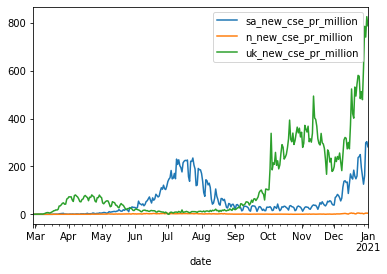

In [531]:
compare.plot(x="date", y=["sa_new_cse_pr_million", "n_new_cse_pr_million", "uk_new_cse_pr_million"])

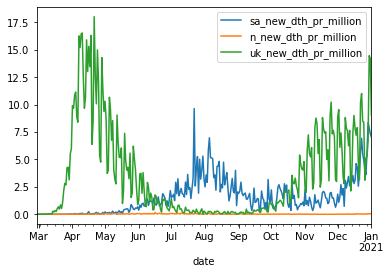

In [532]:
compare.plot(x="date", y=["sa_new_dth_pr_million", "n_new_dth_pr_million", "uk_new_dth_pr_million"])

Check for null values

In [533]:
train.isnull().sum()

iso_code                                330
continent                               676
location                                  0
date                                      0
total_cases                             557
new_cases                               563
new_cases_smoothed                     1519
total_deaths                           8838
new_deaths                             8839
new_deaths_smoothed                    1519
total_cases_per_million                 887
new_cases_per_million                   893
new_cases_smoothed_per_million         1844
total_deaths_per_million               9155
new_deaths_per_million                 9156
new_deaths_smoothed_per_million        1844
reproduction_rate                     15107
icu_patients                          51538
icu_patients_per_million              51538
hosp_patients                         50779
hosp_patients_per_million             50779
weekly_icu_admissions                 57067
weekly_icu_admissions_per_millio

Impute missing values

In [534]:
train = train.drop(['date'], axis=1)

In [535]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute null values in categorical columns

In [536]:
train['iso_code'] = train['iso_code'].fillna('Not Listed')
train['continent'] = train['continent'].fillna('Not Listed')
train['location'] = train['location'].fillna('Not Listed')
train['tests_units'] = train['tests_units'].fillna('Not Listed')

Impute numeric columns with 0

In [537]:
train.fillna(0,inplace=True)

Ordinal encoder

In [538]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.iso_code = enc.fit_transform(train.iso_code.values.reshape(-1,1))
train.continent = enc.fit_transform(train.continent.values.reshape(-1,1))
train.location = enc.fit_transform(train.location.values.reshape(-1,1))
train.tests_units = enc.fit_transform(train.tests_units.values.reshape(-1,1))

Define X and y

In [539]:
iso_code = train.iso_code

y = train[['new_deaths']]
X = train.drop(['iso_code', 'new_deaths', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard Scaler

In [540]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [541]:
y

,new_deaths
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
57605,5.0
57606,5.0
57607,1.0
57608,3.0


In [542]:
X

array([[-0.41488471, -1.70987667, -0.10976241, ..., -0.70642675,
        -0.88790195,  0.89926033],
       [-0.41488471, -1.70987667, -0.10980007, ..., -0.70642675,
        -0.88790195,  1.01218575],
       [-0.41488471, -1.70987667, -0.10980007, ..., -0.70642675,
        -0.88790195,  1.12511117],
       ...,
       [-1.0279168 ,  1.73339548, -0.09849944, ..., -1.01962543,
        -0.71185886,  1.58810539],
       [-1.0279168 ,  1.73339548, -0.10068423, ..., -1.01962543,
        -0.71185886,  1.70103081],
       [-1.0279168 ,  1.73339548, -0.10162595, ..., -1.01962543,
        -0.71185886, -1.69915349]])

Split training file up for training and validation

In [543]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((51849, 40), (5761, 40), (51849, 1), (5761, 1))

Select model

In [544]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=2000, random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9950193122569547


Predict on validation set

In [545]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
y_pred[y_pred < 0] = 0
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.8985937031320614
0.9989589804464899


(None, None)

In [546]:
y_val

,new_deaths
57364,0.0
23749,66.0
35683,0.0
8038,0.0
40813,0.0
...,...
6445,0.0
5975,0.0
32267,1.0
45195,1.0


In [547]:
y_train.values

array([[  0.],
       [  0.],
       [  0.],
       ...,
       [139.],
       [  0.],
       [  0.]])

In [548]:
y_pred

array([ 0, 75,  0, ...,  1,  0,  0])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


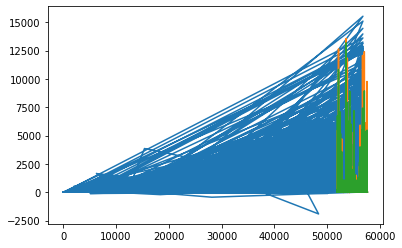

In [549]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train.values] + [x for x in y_val.values])
pyplot.plot([None for i in y_train.values] + [x for x in y_pred.astype(int)])
pyplot.show()

Put predictions in dataframe

In [550]:
df_val=pd.DataFrame({'actual_deaths': y_val.values.ravel(), 'predicted_deaths':y_pred.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual_deaths,predicted_deaths
0,0.0,0
1,66.0,75
2,0.0,0
3,0.0,1
4,0.0,8
...,...,...
5756,0.0,1
5757,0.0,0
5758,1.0,1
5759,1.0,0


Create test dataset

In [551]:
test = last_date.copy()
test.date = today
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
312,AFG,Asia,Afghanistan,2021-01-02,51526.0,0.0,102.286,2191.0,0.0,7.429,1323.612,0.000,2.628,56.283,0.000,0.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,01012021
611,ALB,Europe,Albania,2021-01-02,58316.0,0.0,419.429,1181.0,0.0,6.714,20264.091,0.000,145.746,410.383,0.000,2.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,01012021
923,DZA,Africa,Algeria,2021-01-02,99897.0,287.0,350.857,2762.0,6.0,6.571,2278.099,6.545,8.001,62.986,0.137,0.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,01012021
1229,AND,Europe,Andorra,2021-01-02,8117.0,68.0,51.571,84.0,0.0,0.143,105054.035,880.088,667.462,1087.168,0.000,1.849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,01012021
1517,AGO,Africa,Angola,2021-01-02,17568.0,15.0,67.000,405.0,0.0,1.286,534.530,0.456,2.039,12.323,0.000,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,01012021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56418,VNM,Asia,Vietnam,2021-01-02,1474.0,9.0,5.000,35.0,0.0,0.000,15.143,0.092,0.051,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,01012021
56764,OWID_WRL,NaN,World,2021-01-02,83963772.0,539326.0,587457.000,1827540.0,9424.0,10987.429,10771.769,69.190,75.365,234.456,1.209,1.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9896753.0,0.13,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,01012021
57031,YEM,Asia,Yemen,2021-01-02,2101.0,2.0,1.286,610.0,0.0,0.571,70.442,0.067,0.043,20.452,0.000,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,01012021
57321,ZMB,Africa,Zambia,2021-01-02,20997.0,272.0,203.714,390.0,2.0,1.286,1142.137,14.796,11.081,21.214,0.109,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,01012021


Convert date to number

In [552]:
import datetime 

test['date'] = pd.to_datetime(test['date'], errors='coerce')

test['date_num'] = test['date'].dt.strftime('%d%m%Y')
test

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
312,AFG,Asia,Afghanistan,2021-01-02,51526.0,0.0,102.286,2191.0,0.0,7.429,1323.612,0.000,2.628,56.283,0.000,0.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,02012021
611,ALB,Europe,Albania,2021-01-02,58316.0,0.0,419.429,1181.0,0.0,6.714,20264.091,0.000,145.746,410.383,0.000,2.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,02012021
923,DZA,Africa,Algeria,2021-01-02,99897.0,287.0,350.857,2762.0,6.0,6.571,2278.099,6.545,8.001,62.986,0.137,0.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,02012021
1229,AND,Europe,Andorra,2021-01-02,8117.0,68.0,51.571,84.0,0.0,0.143,105054.035,880.088,667.462,1087.168,0.000,1.849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,02012021
1517,AGO,Africa,Angola,2021-01-02,17568.0,15.0,67.000,405.0,0.0,1.286,534.530,0.456,2.039,12.323,0.000,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,02012021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56418,VNM,Asia,Vietnam,2021-01-02,1474.0,9.0,5.000,35.0,0.0,0.000,15.143,0.092,0.051,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,02012021
56764,OWID_WRL,NaN,World,2021-01-02,83963772.0,539326.0,587457.000,1827540.0,9424.0,10987.429,10771.769,69.190,75.365,234.456,1.209,1.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9896753.0,0.13,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,02012021
57031,YEM,Asia,Yemen,2021-01-02,2101.0,2.0,1.286,610.0,0.0,0.571,70.442,0.067,0.043,20.452,0.000,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,02012021
57321,ZMB,Africa,Zambia,2021-01-02,20997.0,272.0,203.714,390.0,2.0,1.286,1142.137,14.796,11.081,21.214,0.109,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,02012021


Check for null values

In [553]:
test.isnull().sum()

iso_code                                1
continent                               2
location                                0
date                                    0
total_cases                             0
new_cases                               0
new_cases_smoothed                      0
total_deaths                           14
new_deaths                             14
new_deaths_smoothed                     0
total_cases_per_million                 1
new_cases_per_million                   1
new_cases_smoothed_per_million          1
total_deaths_per_million               15
new_deaths_per_million                 15
new_deaths_smoothed_per_million         1
reproduction_rate                     191
icu_patients                          191
icu_patients_per_million              191
hosp_patients                         191
hosp_patients_per_million             191
weekly_icu_admissions                 191
weekly_icu_admissions_per_million     191
weekly_hosp_admissions            

Impute missing values

In [554]:
predict_date = test.date

test = test.drop(['date'], axis=1)

In [555]:
test.dtypes[test.dtypes != 'int64'][test.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute categorical values

In [556]:
test['iso_code'] = test['iso_code'].fillna('Not Listed')
test['continent'] = test['continent'].fillna('Not Listed')
test['location'] = test['location'].fillna('Not Listed')
test['tests_units'] = test['tests_units'].fillna('Not Listed')

Impute numeric values with zero

In [557]:
test.fillna(0,inplace=True)

In [558]:
test

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
312,AFG,Asia,Afghanistan,51526.0,0.0,102.286,2191.0,0.0,7.429,1323.612,0.000,2.628,56.283,0.000,0.191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.498,02012021
611,ALB,Europe,Albania,58316.0,0.0,419.429,1181.0,0.0,6.714,20264.091,0.000,145.746,410.383,0.000,2.333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.785,02012021
923,DZA,Africa,Algeria,99897.0,287.0,350.857,2762.0,6.0,6.571,2278.099,6.545,8.001,62.986,0.137,0.150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,02012021
1229,AND,Europe,Andorra,8117.0,68.0,51.571,84.0,0.0,0.143,105054.035,880.088,667.462,1087.168,0.000,1.849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,7.726500e+04,163.755,0.0,0.000,0.000,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.858,02012021
1517,AGO,Africa,Angola,17568.0,15.0,67.000,405.0,0.0,1.286,534.530,0.456,2.039,12.323,0.000,0.039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,0.0,276.045,3.94,0.000,0.000,26.664,0.000,61.15,0.581,02012021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56418,VNM,Asia,Vietnam,1474.0,9.0,5.000,35.0,0.0,0.000,15.143,0.092,0.051,0.360,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,02012021
56764,OWID_WRL,Not Listed,World,83963772.0,539326.0,587457.000,1827540.0,9424.0,10987.429,10771.769,69.190,75.365,234.456,1.209,1.410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,9896753.0,0.13,0.0,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000,02012021
57031,YEM,Asia,Yemen,2101.0,2.0,1.286,610.0,0.0,0.571,70.442,0.067,0.043,20.452,0.000,0.019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,02012021
57321,ZMB,Africa,Zambia,20997.0,272.0,203.714,390.0,2.0,1.286,1142.137,14.796,11.081,21.214,0.109,0.070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.00,0.0,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,02012021


Ordinal encoder

In [559]:
test_country = test.location
test_country

312      Afghanistan
611          Albania
923          Algeria
1229         Andorra
1517          Angola
            ...     
56418        Vietnam
56764          World
57031          Yemen
57321         Zambia
57609       Zimbabwe
Name: location, Length: 191, dtype: object

In [560]:
test.iso_code = enc.fit_transform(test.iso_code.values.reshape(-1,1))
test.continent = enc.fit_transform(test.continent.values.reshape(-1,1))
test.location = enc.fit_transform(test.location.values.reshape(-1,1))
test.tests_units = enc.fit_transform(test.tests_units.values.reshape(-1,1))

Define X_test

In [561]:
iso_code = test.iso_code

X_test = test.drop(['iso_code', 'total_cases', 'new_deaths','new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard scaler

In [562]:
X_test = scaler.transform(X_test)

In [563]:
X_test

array([[-0.41488471, -1.70987667, -0.10980007, ..., -0.70642675,
        -0.88790195, -1.58622807],
       [ 0.19814738, -1.69184906, -0.10980007, ...,  0.58200139,
         0.47762146, -1.58622807],
       [-1.0279168 , -1.67382146, -0.09898914, ...,  0.42352661,
         0.3301259 , -1.58622807],
       ...,
       [-0.41488471,  1.67931267, -0.10972474, ..., -0.58546078,
        -1.10676633, -1.58622807],
       [-1.0279168 ,  1.69734027, -0.09955417, ..., -0.79457248,
        -0.45968903, -1.58622807],
       [-1.0279168 ,  1.71536787, -0.10162595, ..., -1.01962543,
        -0.71185886, -1.58622807]])

Predict on test set

In [564]:

prediction = model.predict(X_test)
prediction = prediction.astype(int)
prediction[prediction < 0] = 0
prediction.shape

(191,)

Put Predictions in dataframe

In [565]:
df_pred=pd.DataFrame({'country': test_country, 'predicted_date': predict_date, 'predicted_deaths':prediction.astype(int)})
df_pred.reset_index(drop=True, inplace=True)
df_pred

,country,predicted_date,predicted_deaths
0,Afghanistan,2021-01-02,2
1,Albania,2021-01-02,0
2,Algeria,2021-01-02,10
3,Andorra,2021-01-02,2
4,Angola,2021-01-02,0
...,...,...,...
186,Vietnam,2021-01-02,0
187,World,2021-01-02,9405
188,Yemen,2021-01-02,43
189,Zambia,2021-01-02,61
